In [2]:
# import necessary library 
# Read Dataset
# Sanitychekc of  Data 
# Exploratory Data analyssi 
# Misisng alue treatments 
# Outliers treatments 
# duplicates & garbage value tratements 
# Normalization 
# Encoding of datos
#set automatically removes duplicates, so you end up with exactly one of each digit label.


2. fig, axes = plt.subplots(2, 5, figsize=(10, 5))

This is how Matplotlib gives you a grid of plotting areas (“axes”) all at once:

    2, 5

        The first argument (2) is the number of rows of subplots.

        The second (5) is the number of columns.

        So you get a total of 2×5=102×5=10 small plots.

    figsize=(10, 5)

        The size of the entire figure, in inches (width, height).

        Matplotlib’s default DPI (dots per inch) is 100, so this yields a 1000×5001000×500 pixel canvas.

        Adjust to make the subplots larger or smaller.

    Return values

    fig   # a Figure object (the overall “canvas”)
    axes  # a 2×5 NumPy array of Axes objects, one for each subplot

    You can index into axes (e.g. axes[0, 3]) or flatten it (axes.ravel() or axes.flatten()) to loop over every small plot.

3. Getting the “type” of any Python object

    Built-in type()

>>> a = 123
>>> type(a)
<class 'int'>

>>> b = [1,2,3]
>>> type(b)
<class 'list'>

For NumPy arrays

    The Python type is <class 'numpy.ndarray'>, but to see the data-type of the elements:

    >>> import numpy as np
    >>> arr = np.array([1,2,3], dtype=np.int32)
    >>> arr.dtype
    dtype('int32')

For pandas objects

    >>> import pandas as pd
    >>> df = pd.DataFrame({'x':[1,2], 'y':[0.1,0.2]})
    >>> df.dtypes
    x      int64
    y    float64
    dtype: object

So, whenever you need to inspect what kind of object you’re dealing with in Python, reach for type(obj), and if it’s an array-like structure look for .dtype (NumPy) or .dtypes (pandas).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Life Expectancy Data.csv")

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isnull().sum()[lambda x: x > 0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

#identiy garbage values
for i in df.sel

In [10]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10);


Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


# EDA 
- start stadistical analytics

In [11]:
df.describe(include="object") # help me for object also get iniqie 

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


# Data VIsualtiacion 

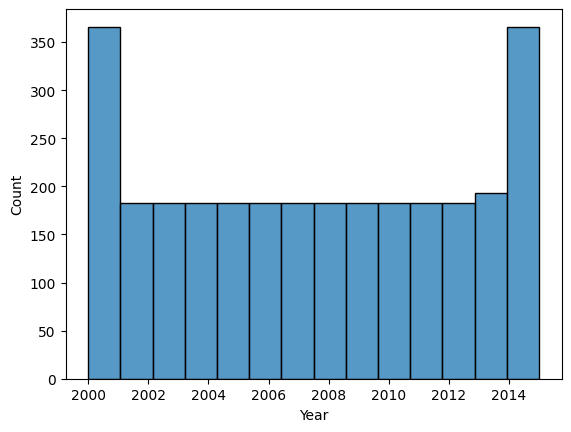

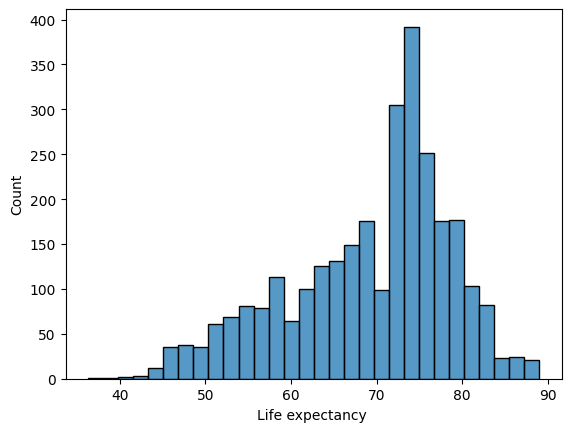

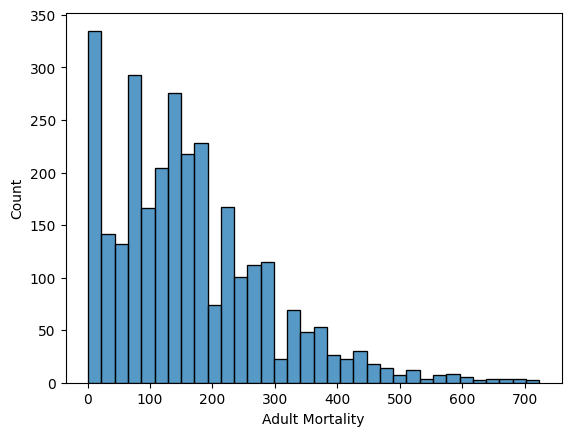

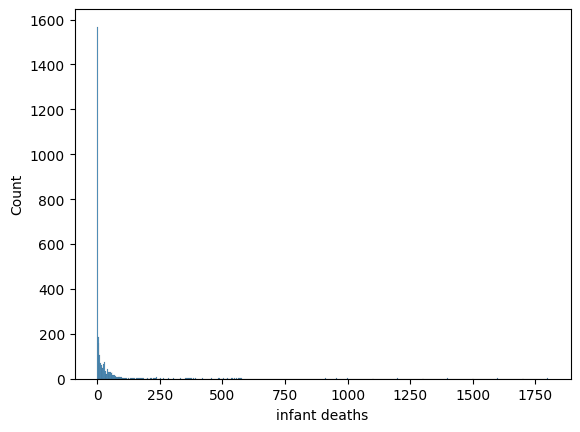

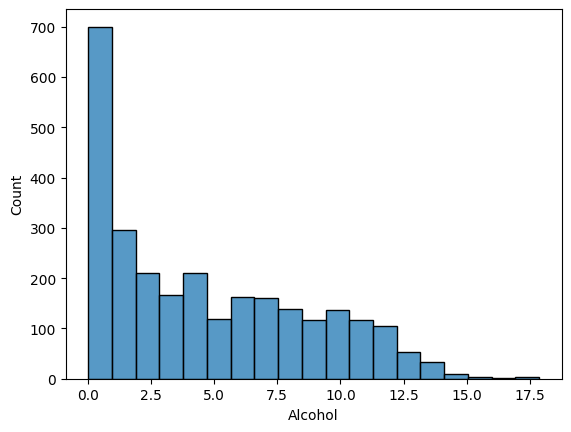

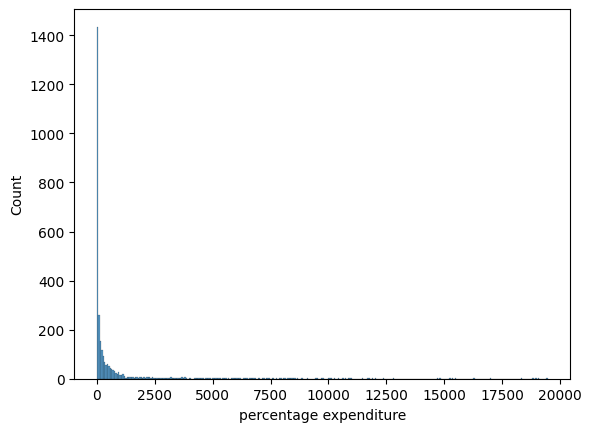

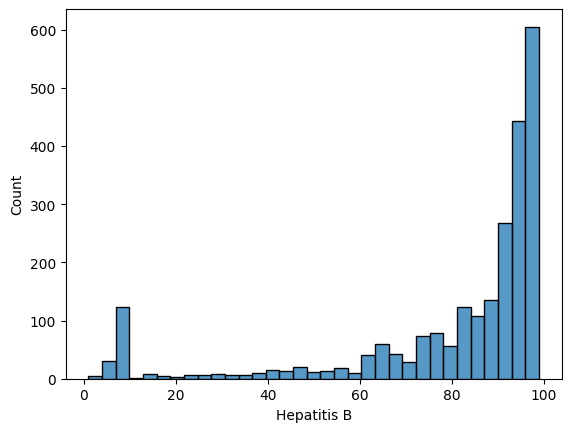

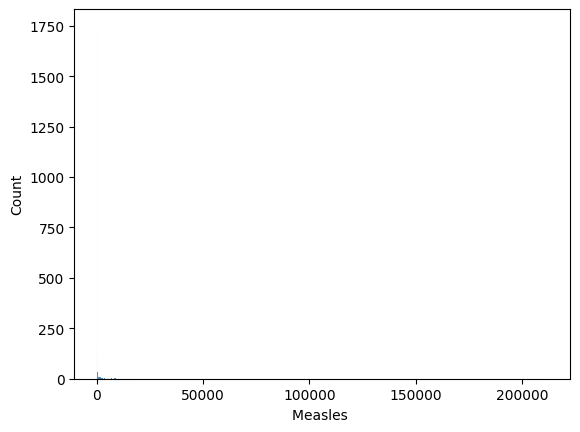

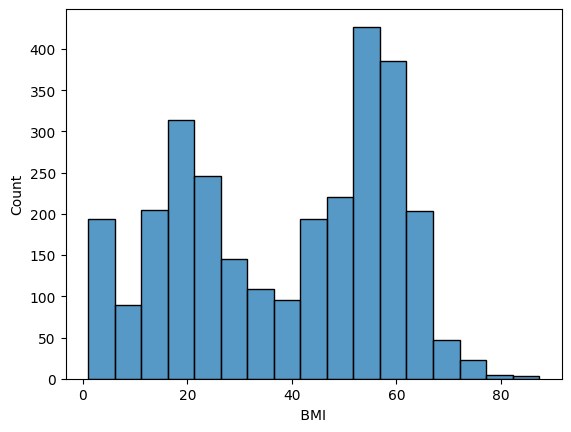

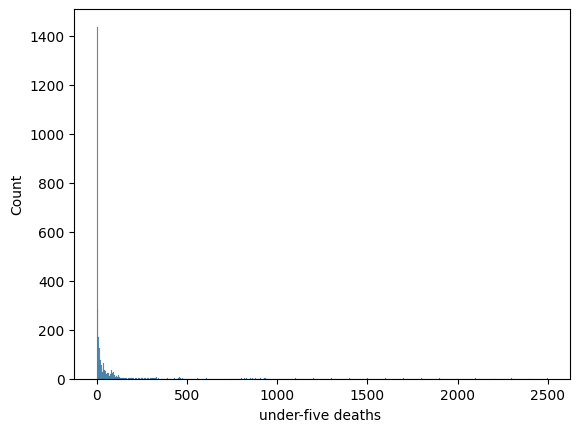

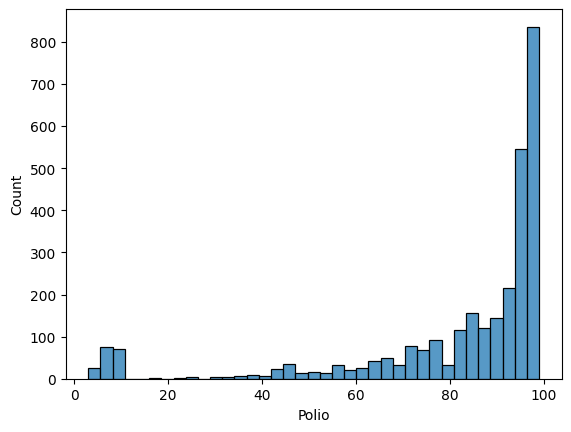

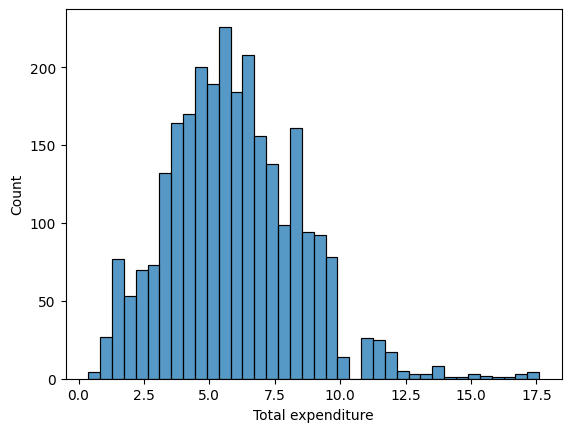

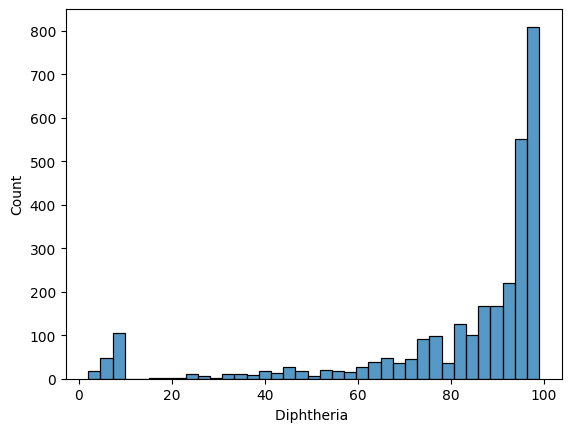

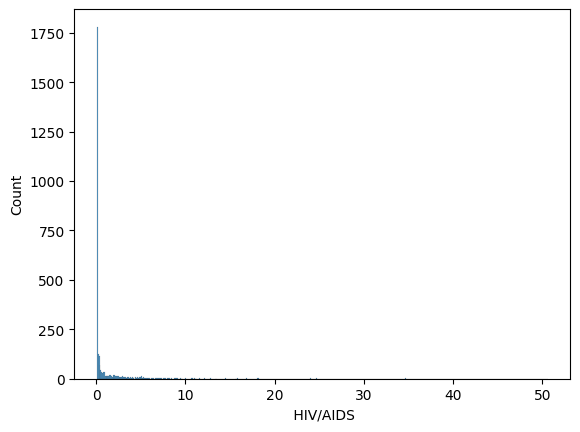

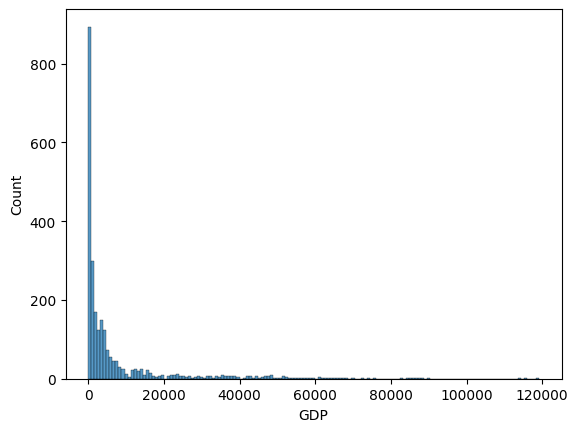

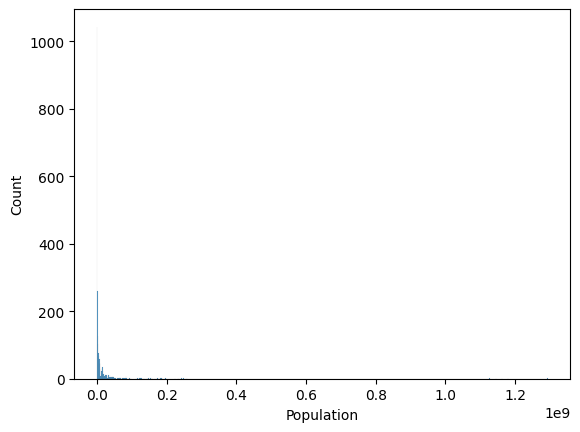

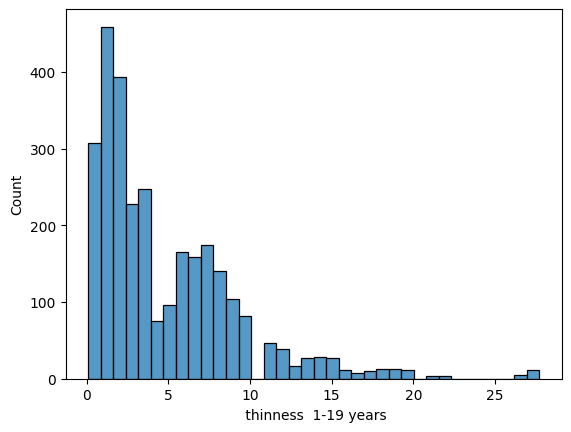

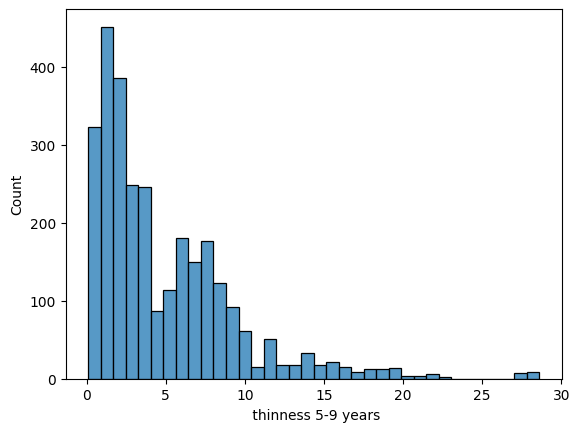

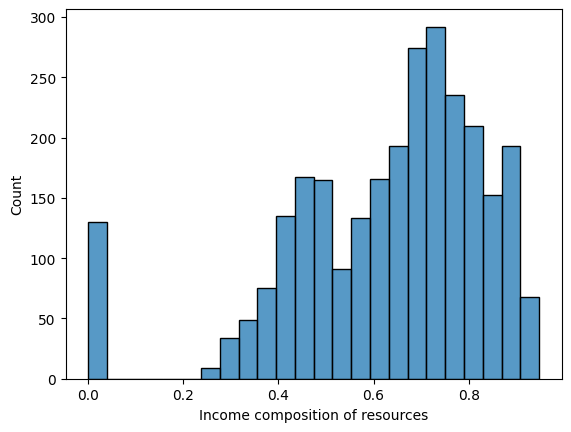

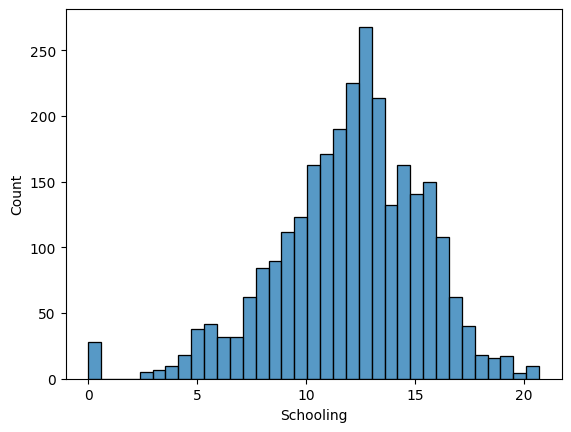

In [12]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show() # use data and the feature for the column iteration i 


## do the same with boxplot to see data distribution by percentils 

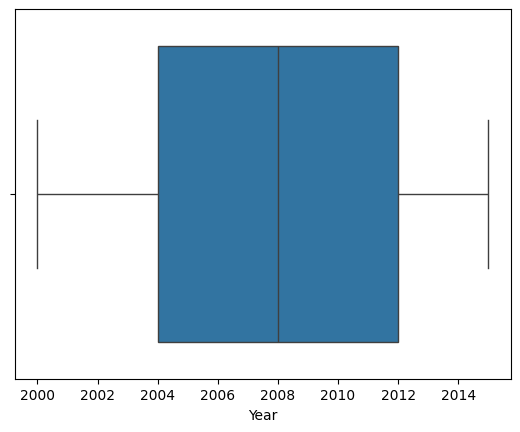

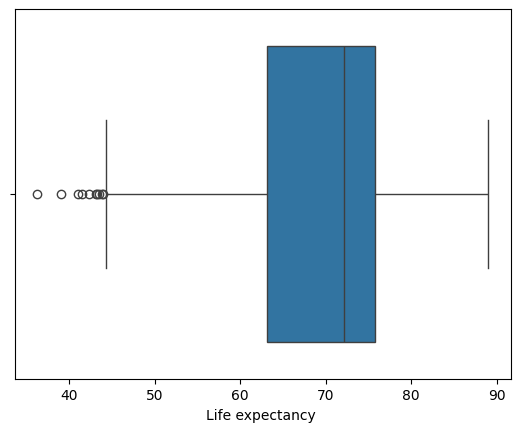

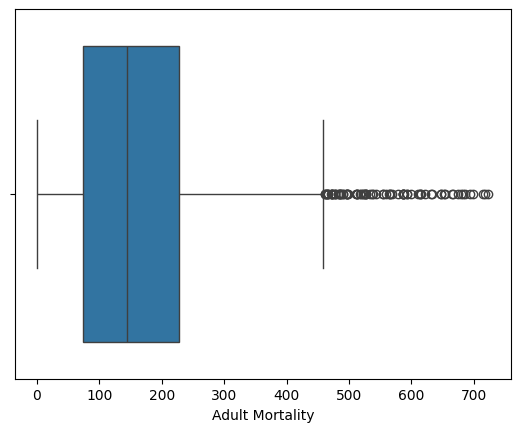

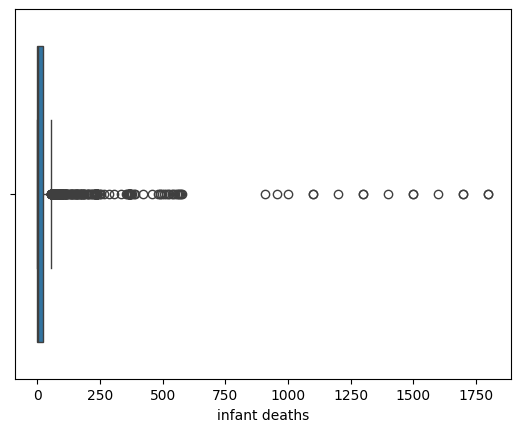

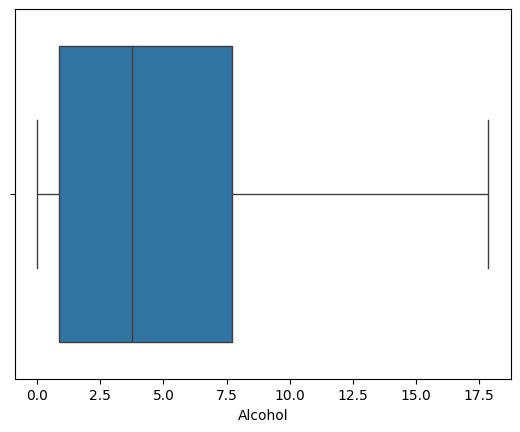

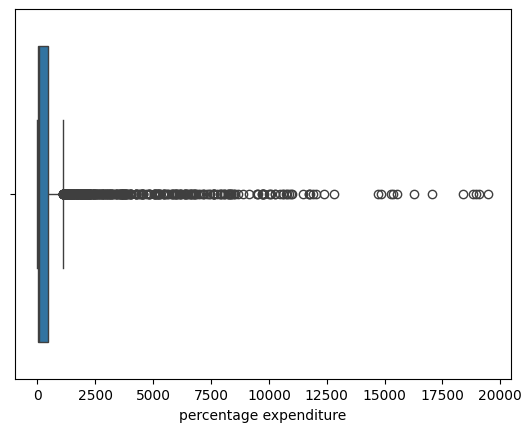

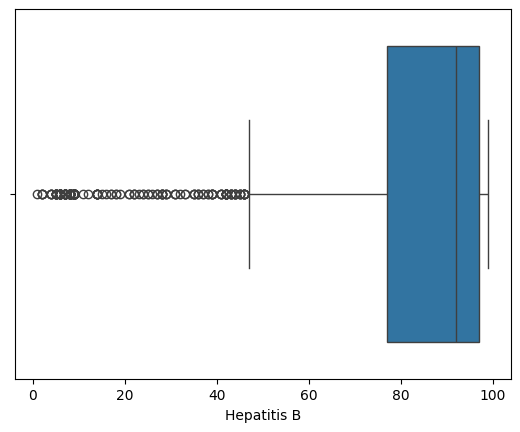

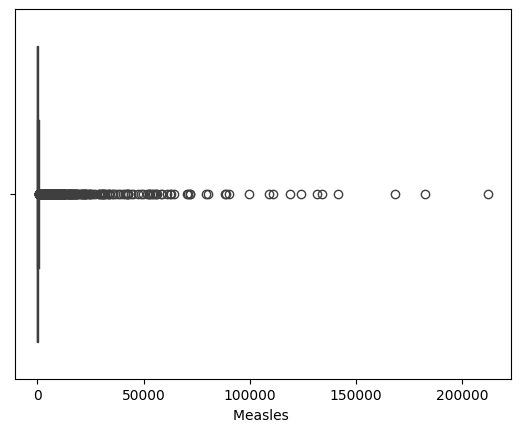

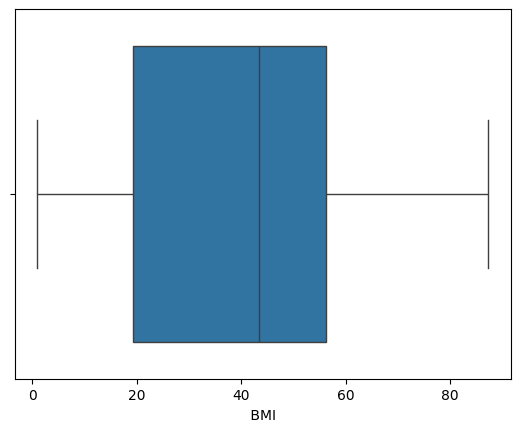

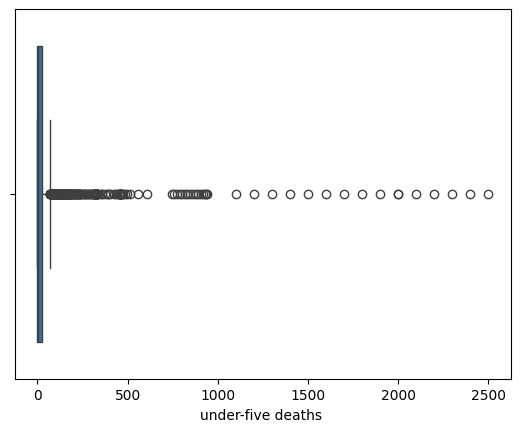

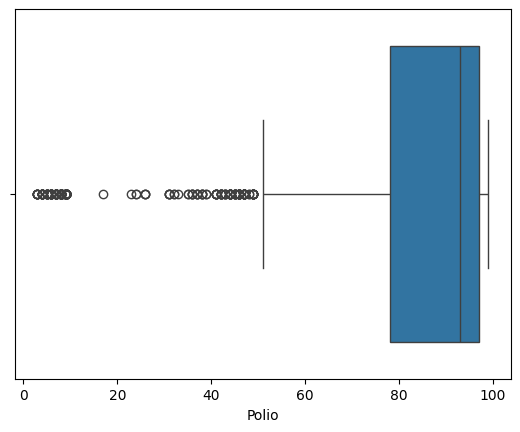

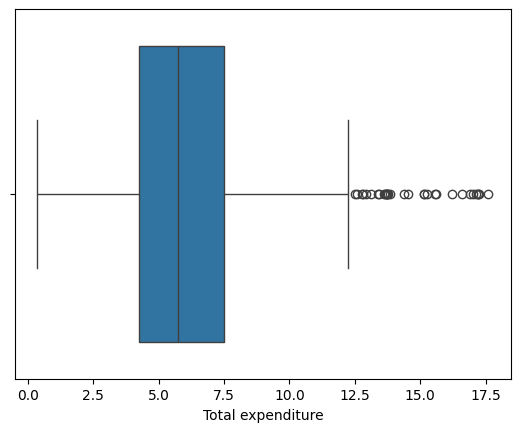

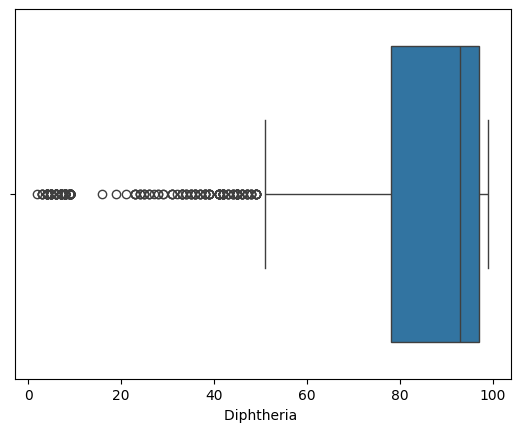

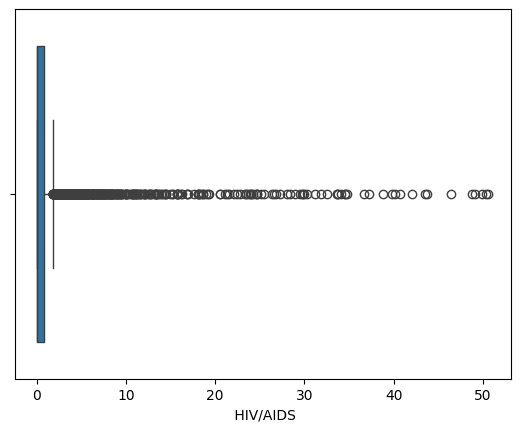

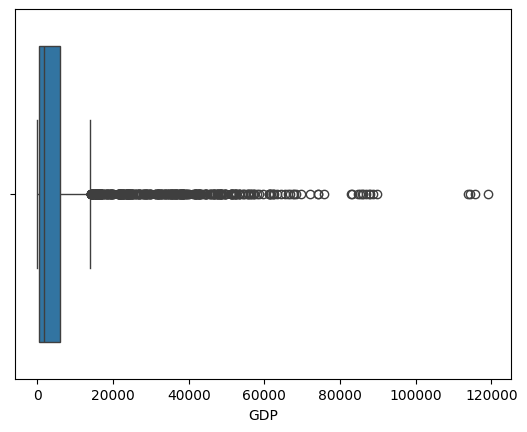

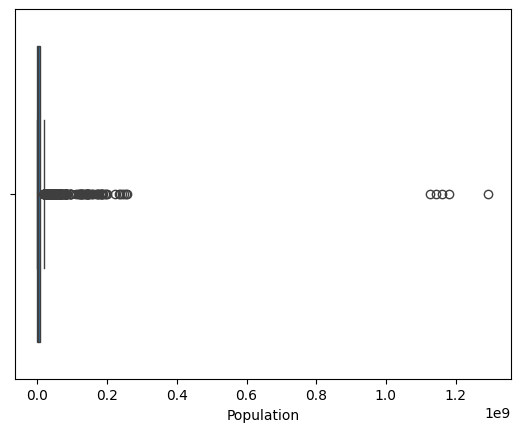

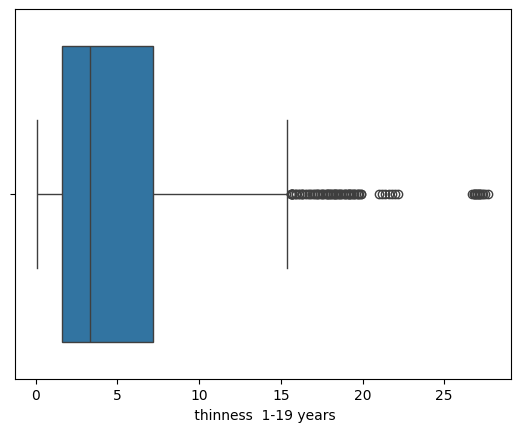

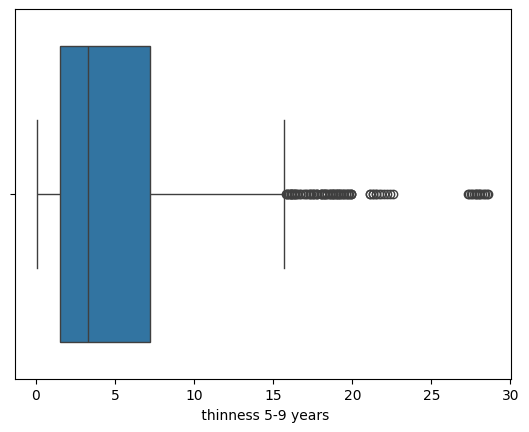

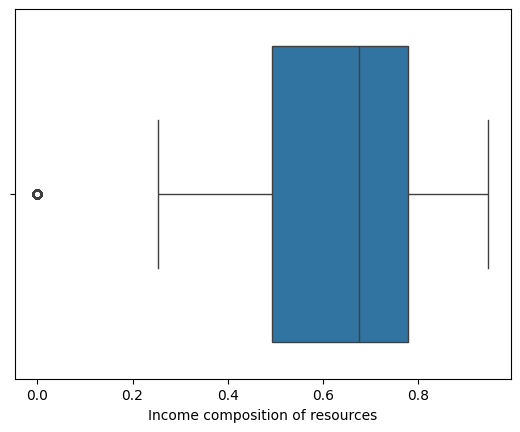

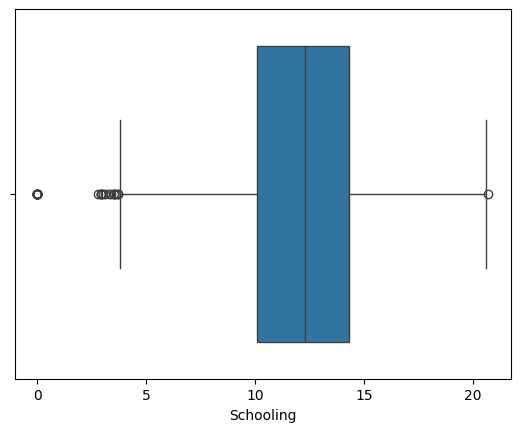

In [13]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show() # use data and the feature for the column iteration i

### scatter plot to udnerstand relationship 

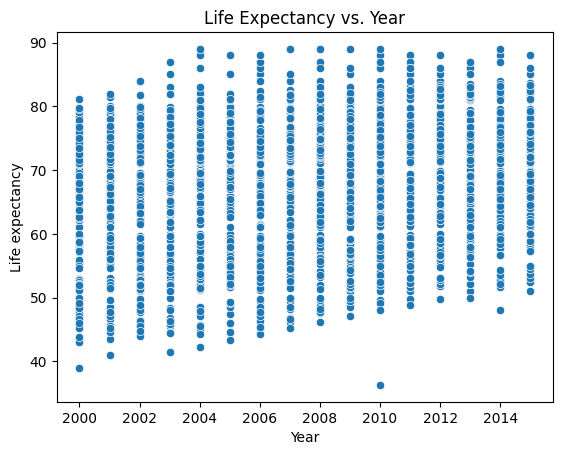

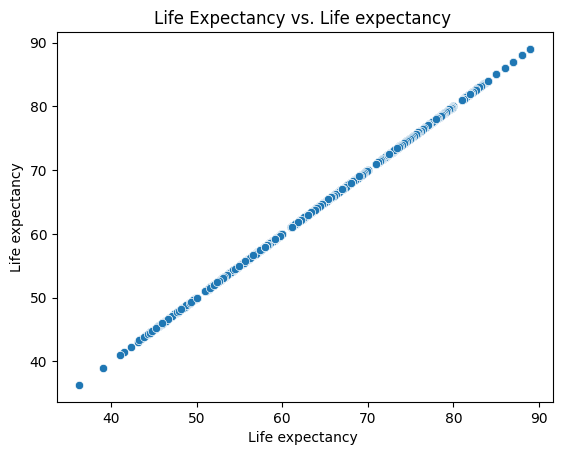

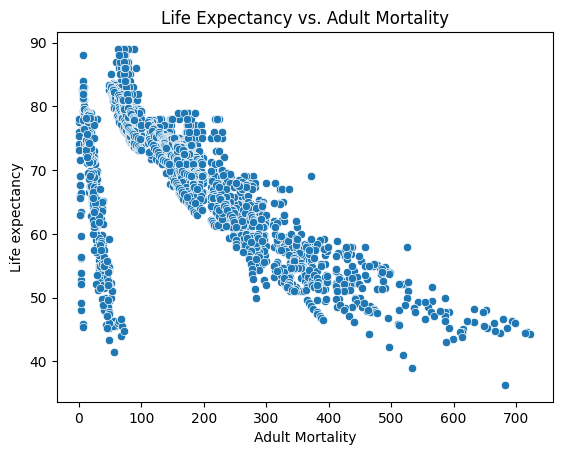

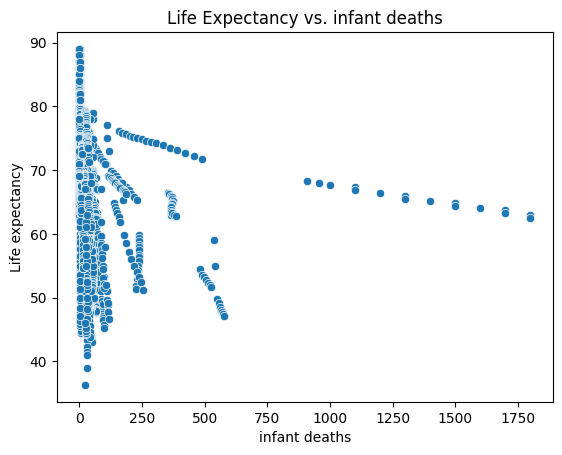

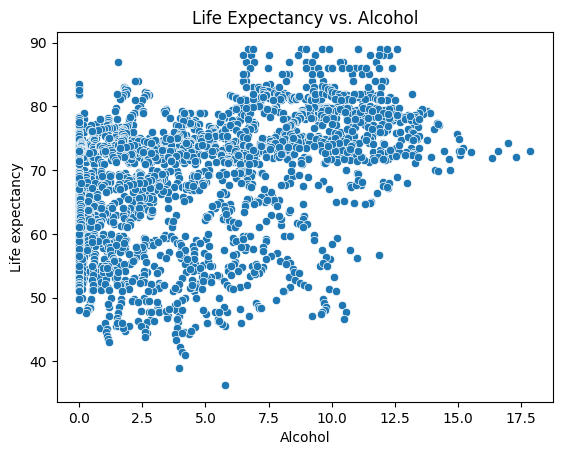

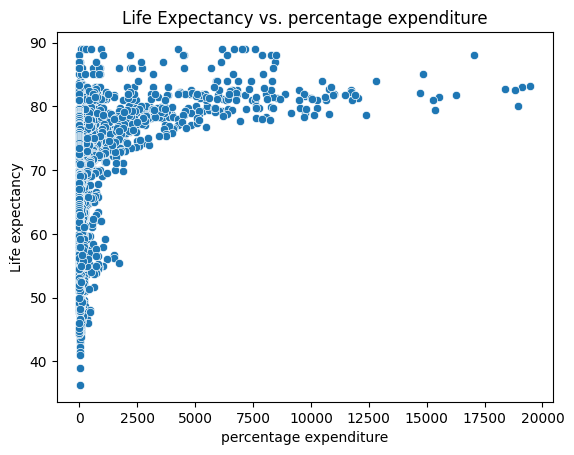

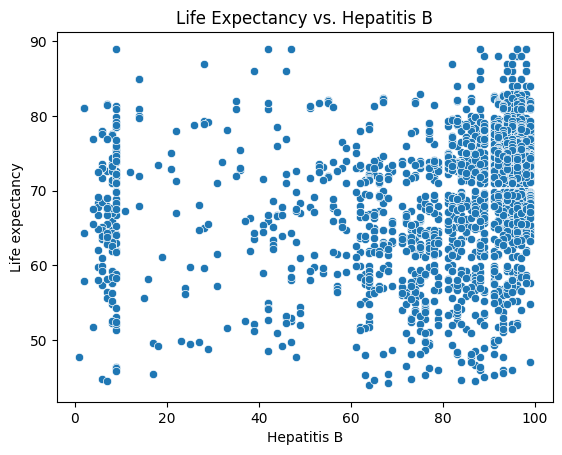

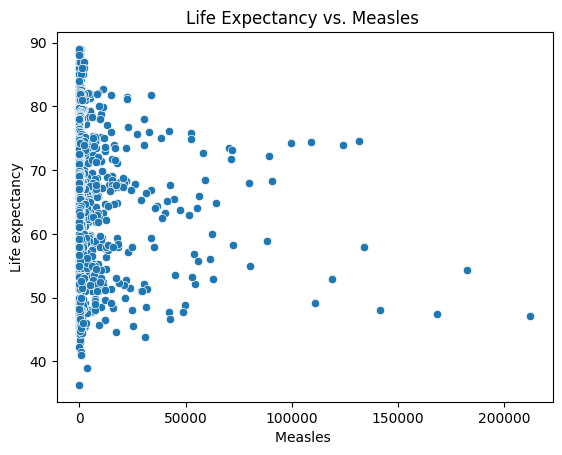

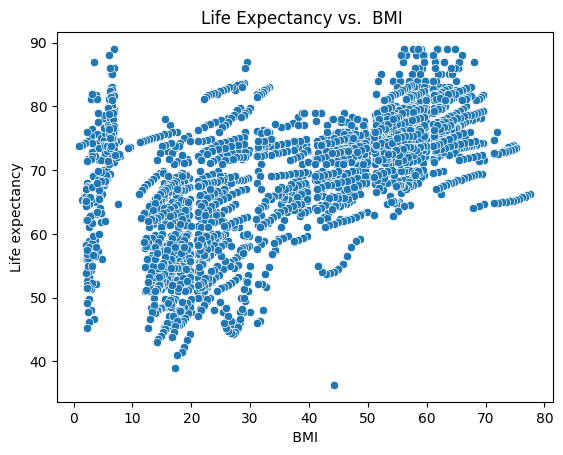

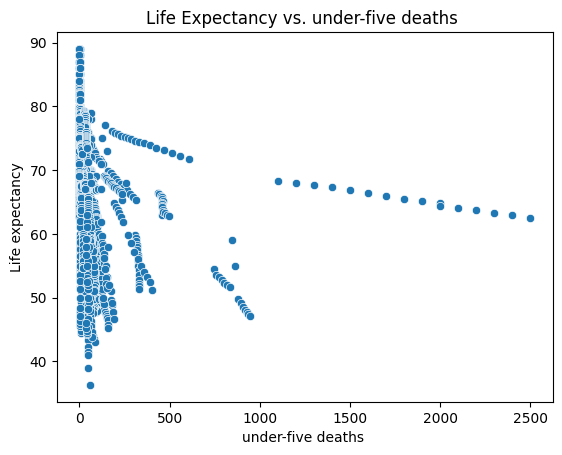

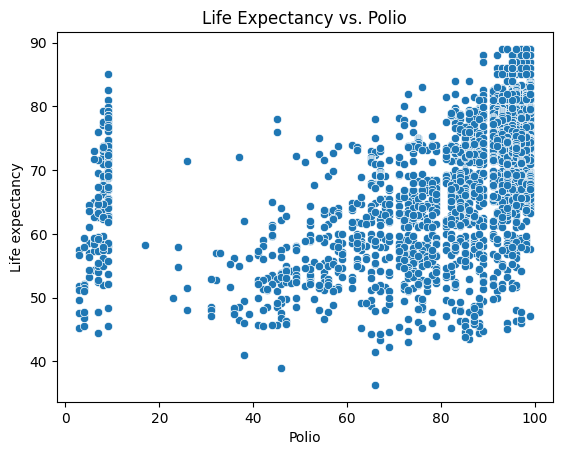

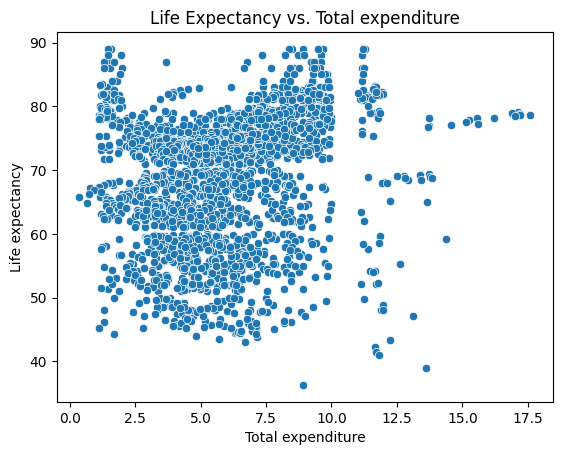

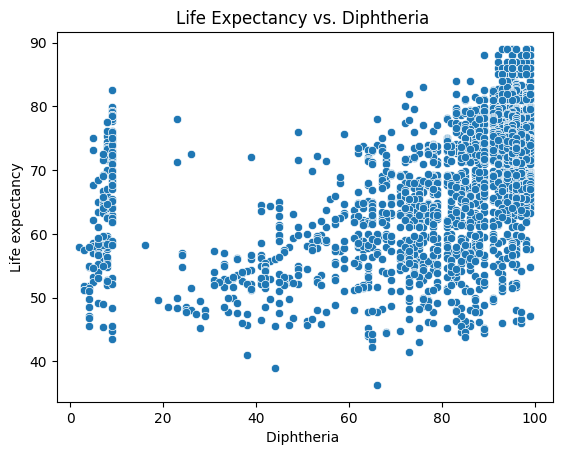

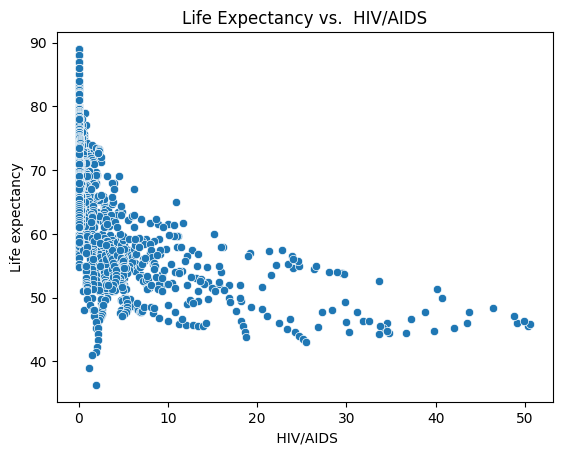

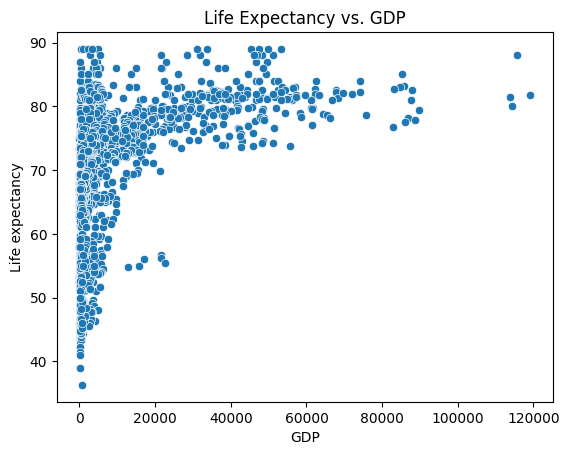

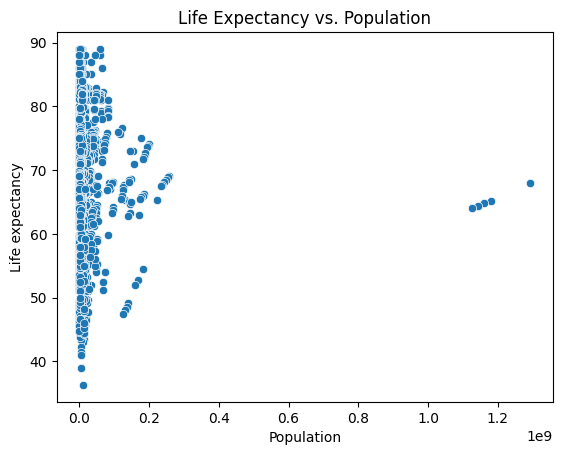

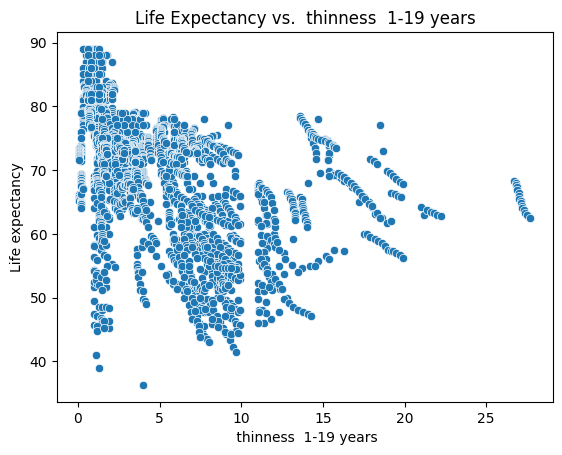

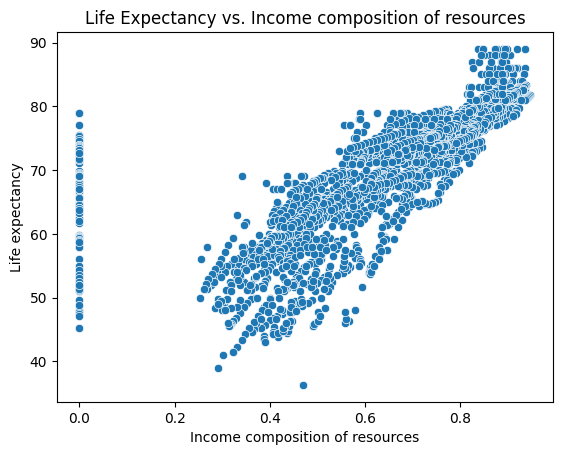

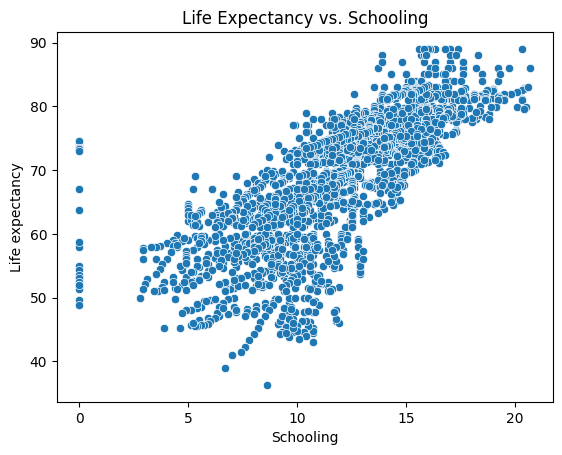

In [14]:
for col_name in ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
                 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
                 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
                 ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                 'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    # Important: Ensure the column exists in your DataFrame to avoid KeyError
    if col_name in df.columns:
        sns.scatterplot(data=df, x=col_name, y="Life expectancy ") # Note: 'Life expectancy ' also has a trailing space
        plt.title(f'Life Expectancy vs. {col_name}') # Add a title for clarity
        plt.xlabel(col_name) # Ensure x-axis label is correct
        plt.ylabel("Life expectancy") # Ensure y-axis label is correct
        plt.show()
    else:
        print(f"Warning: Column '{col_name}' not found in the DataFrame. Skipping plot.")


# correlation matrix in the data 

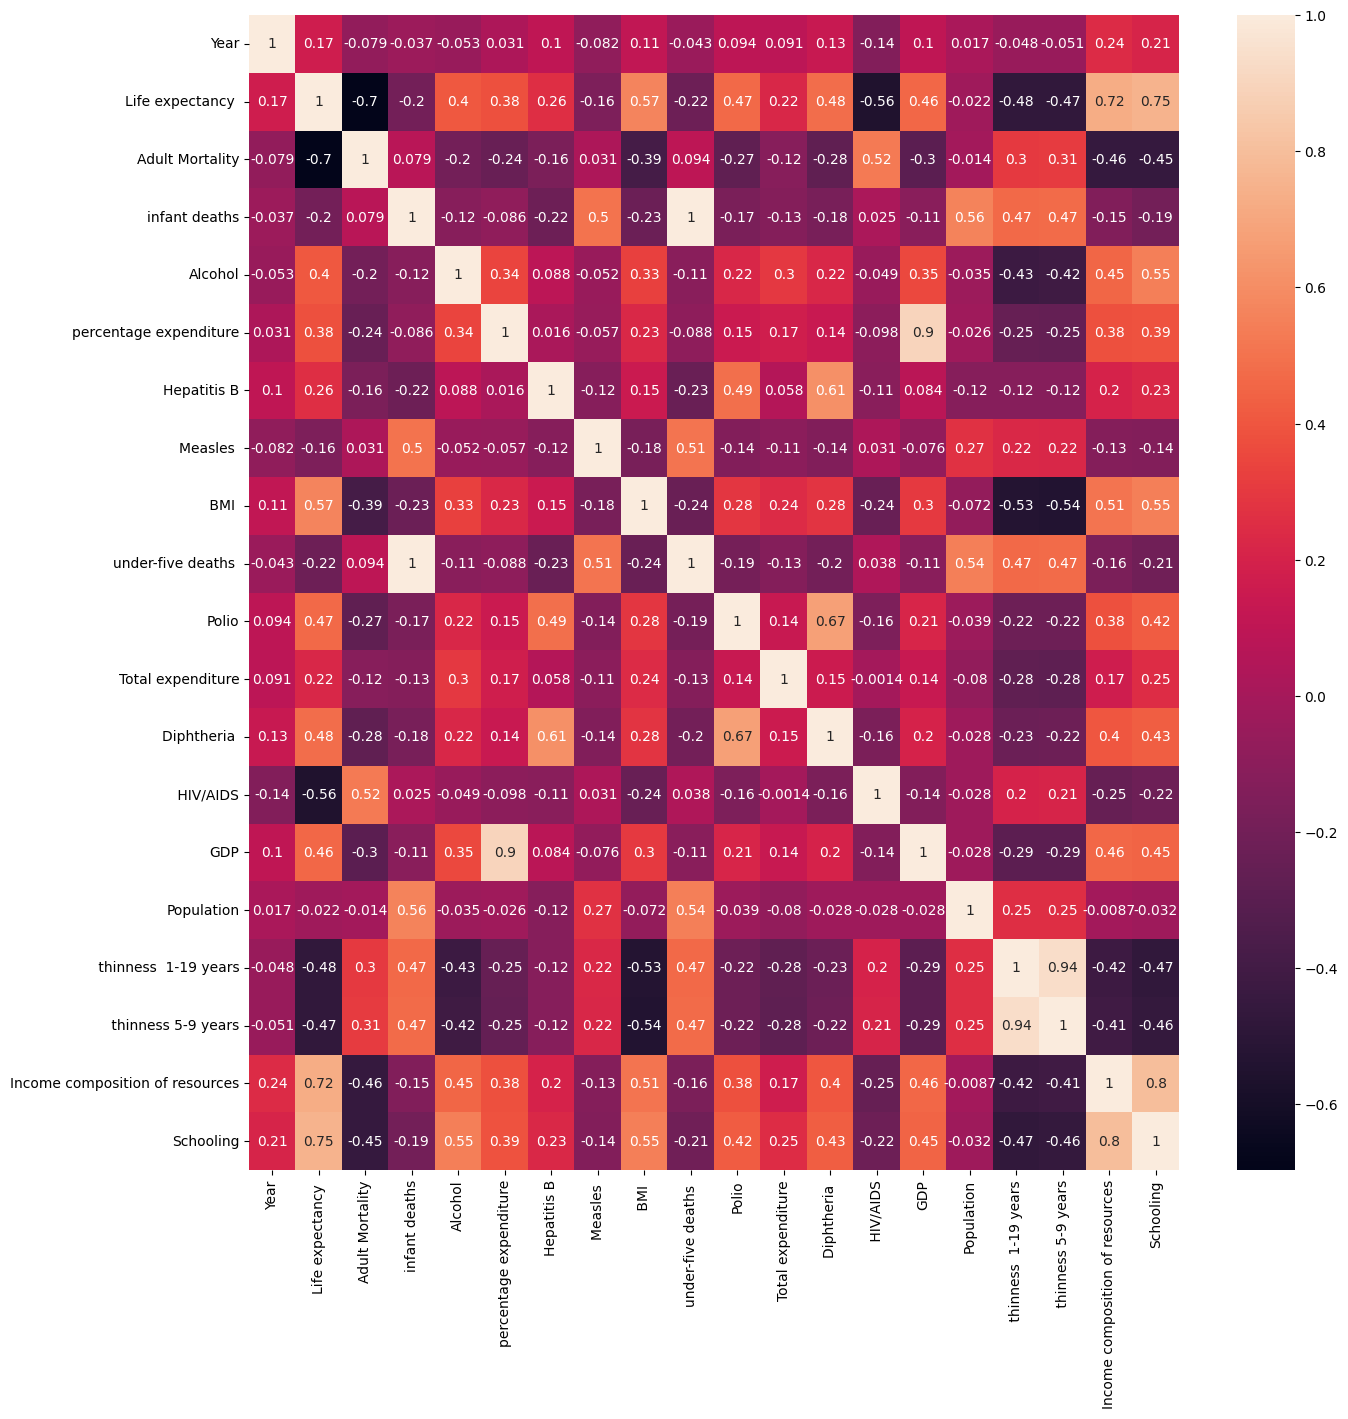

In [15]:
s= df.select_dtypes("number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot= True)
plt.show()

# handle missing and nan values

In [16]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
df.columns = df.columns.str.strip()
for i in ["BMI", "Polio", "Income composition of resources"]:
    df[i] = df[i].fillna(df[i].median())
    

In [18]:
df.isna().sum().loc[lambda x: x > 0]

Life expectancy          10
Adult Mortality          10
Alcohol                 194
Hepatitis B             553
Total expenditure       226
Diphtheria               19
GDP                     448
Population              652
thinness  1-19 years     34
thinness 5-9 years       34
Schooling               163
dtype: int64

In [19]:
df["Adult Mortality"].info()
# sse the atatype to see what we can do 
from sklearn.impute import KNNImputer
impute = KNNImputer() 

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Adult Mortality
Non-Null Count  Dtype  
--------------  -----  
2928 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [20]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [21]:
df.isna().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

## set up outliers treatment
 -   in the data visualtiation we can see the  outliers  i nthe boxplot for     example 

In [22]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75]) # i got the 25 and 75 percentile of colum 
    iqr= q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [23]:
wisker(df["GDP"])

(np.float64(-9773.52021495771), np.float64(17837.165679596183))

In [24]:
df.columns
for i in ["GDP","Total expenditure","thinness  1-19 years","thinness 5-9 years"]:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])


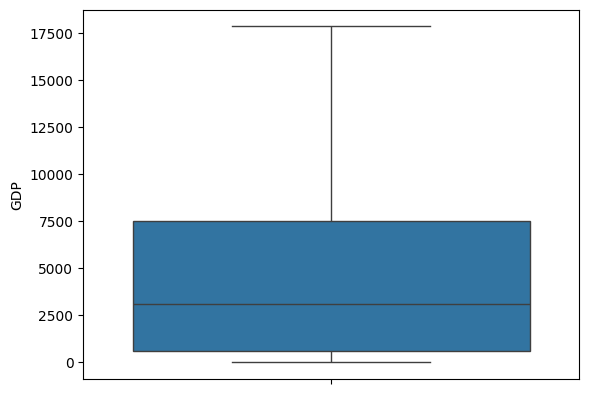

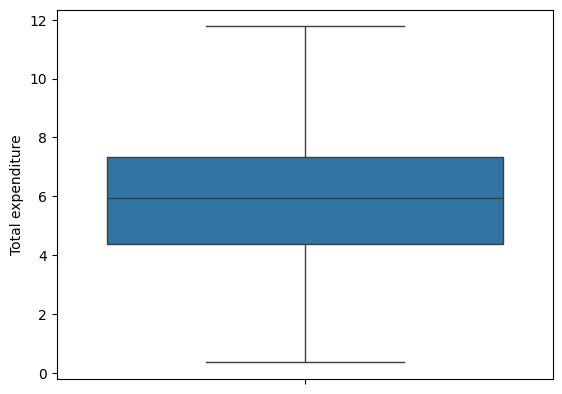

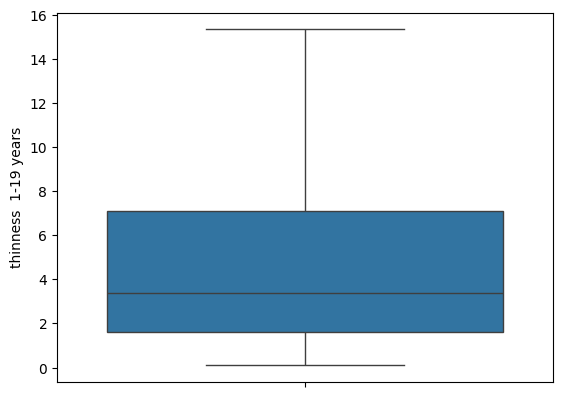

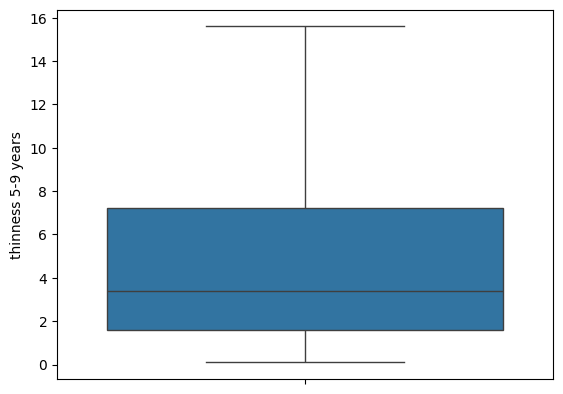

In [25]:
for i in ["GDP","Total expenditure","thinness  1-19 years","thinness 5-9 years"]:
    sns.boxplot(df[i])
    plt.show()

# STEP 7 duplicate &% garbage value

In [26]:
df.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


# step 8 encoding the data 


In [27]:
dummy = pd.get_dummies(data=df,columns=["Country","Status"],drop_first=True)

In [28]:
dummy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


# PYTHON ITNERMIDATE

In [ ]:
mylist = ["banane", "cherry", "apple"]

print(mylist )
if "banana" in mylist:
    print("yes")
else:
    print("no banana in my lis")
for x in mylist:
    print(x)

item = mylist[-1] # the last element or -2 the second last element 
print("index -1 is the last element in list: mylist[-1] ",item)
print("index -2 is the last element in list: mylist[-2] ",mylist[-2])
print("check if itme is in linst if banna  in mylist")
print("length of elements is len(mylist)",len(mylist))
print("type with type(mylist)",type(mylist))
mylist.append("lemon")
print(mylist)
mylist.insert(1,"blueberry") ## in 2 positon weil index is 1 
print(mylist)
item=mylist.pop() ## remove the last element not only get it 
print(item)
print(mylist)


['banane', 'cherry', 'apple']
no banana in my lis
banane
cherry
apple
index -1 is the last element in list: mylist[-1]  apple
index -2 is the last element in list: mylist[-2]  cherry
check if itme is in linst if banna  in mylist
length of elements is len(mylist) 3
type with type(mylist) <class 'list'>
['banane', 'cherry', 'apple', 'lemon']
['banane', 'blueberry', 'cherry', 'apple', 'lemon']
lemon
['banane', 'blueberry', 'cherry', 'apple']
list with mylist.reverse None


In [26]:
mylist =["banane", "cherry", "apple"]
print(mylist)
item= mylist.reverse()
print("list with mylist.reverse",mylist)
mylist = [1,2,34,-1]
print("in sort in place with .sort or reverse",mylist)
mylist.sort()
print(mylist )
print("to create a new list use sorted ")
new_list= sorted(mylist)
mylist = [1,2,34,-1]
print("sorted new ",new_list)
print("oldone is ",mylist)
mylist = [1,2,3,4,5,6,7,8,9]
a = mylist[::2]
print("mylist",mylist)
print("list using [::2] in my list :",a)
print("if we do no specify it start by 0 if we use [] \n" \
"if we use [1:5] it would go from the secod element to the 5 \n"\
     "if we use dont specify at end it would go to the end [1:] \n" \
     "if we usea 3 element like these [::2] every two is the step so then the 2 then 4  or negative with -1 reverse list  " )
a=mylist[::-1]
print("using [::-1] mylist isreversed:",a)
list_org= ["babae","cherry","apple"]
list_copy= list_org 
print("if we use list_cpoy= list , then when we do something like list_copy.append it also bee in the oroginal ist ")
print(list_org)
print("copy",list_copy.append("lemom"))
print(list_org)
print("to get ar eal copy use  list.copy() or list[:]")
mylistnr = [1,2,3,4,5,6]
b= [x*x for x in mylistnr]
print("mylisnr",mylistnr)
print("list comprensention,  \n " \
"we want a list with sqaute b= [x*x for x in mylistnr] \n" \
"expresion and for in []",b)


['banane', 'cherry', 'apple']
list with mylist.reverse ['apple', 'cherry', 'banane']
in sort in place with .sort or reverse [1, 2, 34, -1]
[-1, 1, 2, 34]
to create a new list use sorted 
sorted new  [-1, 1, 2, 34]
oldone is  [1, 2, 34, -1]
mylist [1, 2, 3, 4, 5, 6, 7, 8, 9]
list using [::2] in my list : [1, 3, 5, 7, 9]
if we do no specify it start by 0 if we use [] 
if we use [1:5] it would go from the secod element to the 5 
if we use dont specify at end it would go to the end [1:] 
if we usea 3 element like these [::2] every two is the step so then the 2 then 4  or negative with -1 reverse list  
using [::-1] mylist isreversed: [9, 8, 7, 6, 5, 4, 3, 2, 1]
if we use list_cpoy= list , then when we do something like list_copy.append it also bee in the oroginal ist 
['babae', 'cherry', 'apple']
copy None
['babae', 'cherry', 'apple', 'lemom']
to get ar eal copy use  list.copy() or list[:]
mylisnr [1, 2, 3, 4, 5, 6]
list comprensention,  
 we want a list with sqaute b= [x*x for x in mylist

In [ ]:
# tupple a list is inmutable, after created cann not be change 
# inside paranthesis u put everything does need to be use , 
mytuple = ("max",)
print("to create a tuple mytuple=('max',) the comma at the end is neeedit to be a tuple and not a string",type(mytuple))
mytuple = tuple(["max",28, "Boston"])
item= mytuple[2]
print("if we a tupple with fewer elemnts as the index to print we get an error. hier item is mytuple[2] beause it has 3 element ",item)
print(item)

print("we cannnot assing like mytuple[0]= BOB , it would get an error ",)
tupleChar= ('a','a','b','c','d','e','z')
print(tupleChar.count('a'))
tupleChar.index('a')
print("first idnex with tuple.index(('a'))",tupleChar.index('a'))
mu_listChar= list(mytuple)
print("convert list into tuplle with mu_listChar= list(mytuple)",type(mu_listChar))
b = tupleChar[::-1]
print("before reverse tuppel: ",tupleChar)
print("step with index b = mylistchar[::-1]:",b)
exampletuppel = tuple(["Max",22,"Boston"])
type(exampletuppel)
name= exampletuppel[0]
pzl= exampletuppel[1]
print("name",name)
import sys
import timeit
mylist = [0,1,2,"hello",True]
my_tuple= (0,1,2,"hello",True)
print("tuppel",type(exampletuppel))
print("size of list ",sys.getsizeof(mylist))
print("size of tupplr ",sys.getsizeof(my_tuple))



to create a tuple mytuple=('max',) the comma at the end is neeedit to be a tuple and not a string <class 'tuple'>
if we a tupple with fewer elemnts as the index to print we get an error. hier item is mytuple[2] beause it has 3 element  Boston
Boston
we cannnot assing like mytuple[0]= BOB , it would get an error 
2
first idnex with tuple.index(('a')) 0
convert list into tuplle with mu_listChar= list(mytuple) <class 'list'>
before reverse tuppel:  ('a', 'a', 'b', 'c', 'd', 'e', 'z')
step with index b = mylistchar[::-1]: ('z', 'e', 'd', 'c', 'b', 'a', 'a')
name Max
tuppel <class 'tuple'>
size of list  104
size of tupplr  80


In [25]:
## diccionary datatype with keys and mutable 
mydic = {"name": "Max", "age":28, "city": "New York"}
value = mydic["age"]
print(value)
#notexisitingvalue = mydic["lastname"] # key error 'lastname'ArithmeticError
# diccionary arem utable 
mydic["email"] ="ma@gmail.com"
print(mydic)
# delete with del 
del mydic["name"]
print(mydic)
mydic.popitem()# removes last item 
print(mydic)
try:
    print(mydic["lastnme"])
except:
    print("Error lastname not found ")    

for key, value in mydic.items():
    print(key,value)
  #by coping with = cange will aslo go to the copy 
mydic_copy= mydic
mydic_copy["PZL"]= "54567"
print("mydictcopy:",mydic_copy)
print("mydic:",mydic)   
print("to copy us dict.copy")
mydic_copy= mydic.copy()
mydic_copy["new value"] = 121212
print("mydictcopy:",mydic_copy)
print("mydic:",mydic)  
# my dict doesn  work like arraz 
mytuple = (8,7)
mydict = {mytuple:15}
print(mydict)

## set does not allow duplicates set([])
myset = set([1,2,3,2])
print(myset)
myset = set('hello') # wil lelimnate also the second l 
print(myset)
myset.add(1)
myset.add(3)
myset.discard(3) # if not found not error here
try:
    myset.discard(50) # does nto work with try because is does not trow exception 
except:
    print("error myset does nto have value 50")
odds= {1,3,5}
evens= {0,2,4,6}
primes= {1,2,3,5}
u = odds.union(evens)
print(u)
i = evens.intersection(primes)
print(i)

28
{'name': 'Max', 'age': 28, 'city': 'New York', 'email': 'ma@gmail.com'}
{'age': 28, 'city': 'New York', 'email': 'ma@gmail.com'}
{'age': 28, 'city': 'New York'}
Error lastname not found 
age 28
city New York
mydictcopy: {'age': 28, 'city': 'New York', 'PZL': '54567'}
mydic: {'age': 28, 'city': 'New York', 'PZL': '54567'}
to copy us dict.copy
mydictcopy: {'age': 28, 'city': 'New York', 'PZL': '54567', 'new value': 121212}
mydic: {'age': 28, 'city': 'New York', 'PZL': '54567'}
{(8, 7): 15}
{1, 2, 3}
{'l', 'o', 'e', 'h'}
{0, 1, 2, 3, 4, 5, 6}
{2}


In [36]:
import functools
def start_end_decorator(func):
   def wrapper():
       print("start")
       func() 
       print("end")
   return wrapper
#@mydecorator 
# we update the function and use the dosomething as an argument witout changing the funct
@start_end_decorator
def print_name():
    print("alex")

#print_name()  

# what happens if funct has arguments then we need arg for the wrapper 
def decorator_wth_param(func):
   @functools.wraps(func)
   def wrapper(*args,**kwargs):
       print("start")
       result=func(*args,**kwargs) 
       print("end")
       return result
   return wrapper
@decorator_wth_param
def add5(x):
    return x +5

result = add5(10)
print(result)
print(help(add5))

def repeat(n_times):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper(*args,**kwargs):
            for _ in range(n_times):
                result = func(*args, **kwargs)
            return result
        return wrapper
    return decorator_repeat

@repeat(n_times=4)
def greet(name):
    print(f'hello {name}')

greet('Alex')    


start
end
15
Help on function add5 in module __main__:

add5(x)

None
hello Alex
hello Alex
hello Alex
hello Alex


class COuntCalls:
    

In [38]:
class CountCalls:
    def __init__(self,func):
        self.func= func
        self.num_calls=0
    def __call__(self,*args,**kwargs):
        self.num_calls+=1
        print(f'this ececuted {self.num_calls} times ')
        return self.func(*args,**kwargs)
@CountCalls
def say_hello():
    print('hello')
## check decorators to register, and catch return values, update state 
say_hello()
say_hello()


this ececuted 1 times 
hello
this ececuted 2 times 
hello
